# 1. Introduction

The primary goal of a recommender system is to increase "product" sales. Recommender systems are, after all, utilized by merchants to increase their profits. Although the primary goal of a recommendation system is to increase revenue for the merchant, this is often achieved in ways that are less obvious than might seem at first sight. 

In order to achieve the broader business-centric goal of increasing revenue, the common operational and technical goals of recommender systems are as follows:
1. *Relevance:* 
   - Recommend items that are relevant to the user.
2. *Novelty:* 
   - Recommend items that the user has not seen in the past.
3. *Serendipity:* 
   - Recommend items that that somewhat "unexpected" (i.e. surprising to the user).
4. *Recommendation Diversity*:
   - Recommend items that are not very similar.

Also, providing the user an explanation for why a particular item is recommended is often useful. For example, in the case of Netflix, recommendations are provided along with previously watched movies.

### 1a. Types of Recommenders

The basic models for recommender systems work with two kinds of data, which are:
- (i) the user-item interactions, such as ratings or buying behavior.
- (ii) the attribute information about the users and items such as textual profiles or relevant keywords.

Methods that use the former are referred to as **collaborative filtering** methods, whereas methods that use the latter are referred to as **content-based** recommender methods. Note that content-based systems also use the ratings matrices in most cases, although the model is usually focused on the ratings of a single user rather than those of all users. In **knowledge-based** recommender systems,
the recommendations are based on explicitly specified user requirements Instead of using historical rating or buying data, external knowledge bases and constraints are used to create the recommendation.

| **Approach**             | **Conceptual Goal**                                            | **Input**                                    |
|----------------------|-------------------------------------------------|------------------------------------------|
| **Collaborative Filtering** | Recommend items based on collaborative approach that leverages the ratings and actions of my peers/myself | User ratings + community ratings|
| **Content-Based**        | Recommend items based on the content (attributes) I have favored in my past ratings and actions | User ratings + item attributes (e.g., description, genre) |
| **Knowledge-based**               | Recommend items based on my explicit specification of the kind of content (attributes) I want | User specification + item attributes + domain knowledge |


### 1b. Types of Feedback

The design of recommendation algorithms is influenced by the system used for tracking ratings (i.e. the user-item interaction). The ratings are often specified on a scale that indicates the specific level of like or dislike of the item at hand. There are two types of feedback as follows:

**Type of Feedback:** <br>
    - *Explicit* Feedback: Ratings, Likes, Dislikes <br>
    - *Implicit* Feedback: Views, Clicks, Purchases <br>

These can take the form of:
   - *Interval:* 1 to 5 (i.e. 1, 2, 3, 4, 5), -10 to 10 (i.e. -10, -9, ... , 9, 10)
   - *Ordinal:* Strongly agree, Agree, Neutral, Disagree, Strongly disagree (difference is that the distant between these is not always equal)
   - *Binary:* Like, Dislike (special case of interval and ordinal)
   - *Unary:* Allow the users to only specify positive feedback (e.g. "like" on facebook)

Note that possible ratings might vary with the system at hand. Along each of the possible ratings, we have indicated a semantic interpretation of the user’s level of interest. This interpretation might vary slightly across different merchants, such as Amazon or Netflix. For example, Netflix uses a 5-star ratings system in which the 4-star point corresponds to “really liked it,” and the central 3-star point corresponds to “liked it.” Therefore, there are three favorable ratings and two unfavorable ratings in Netflix, which leads to an unbalanced rating scale.

# 2. Collaborative Filtering

**Collaborative filtering models** use the collaborative power of the ratings provided by multiple users to make recommendations. The basic idea of collaborative filtering methods is that these unspecified ratings can be imputed because the observed ratings are often highly correlated across various users and items.

There are two types of methods that are commonly used in collaborative filtering, which are referred to as:
1. **Memory-based methods:** Memory-based methods are also referred to as neighborhood-based collaborative filtering algorithms and can be defined in one of two ways:

   a. *User-based* collaborative filtering: <br> In this case, the ratings provided by like-minded users of a target user A are used in order to make the recommendations for A. Thus, the basic idea is to determine users, who are similar to the target user A, and recommend ratings for the unobserved ratings of A by computing weighted averages of the ratings of this peer group.

   b. *Item-based* collaborative filtering: <br> For example, user's ratings on similar science fiction movies like Alien and Predator can be used to predict his rating on Terminator. Similarity functions are computed between the columns of the ratings matrix to discover similar items.

2. **Model-based methods:** In model-based methods, machine learning and data mining methods are used in the context of predictive models. In cases where the model is parameterised, the parameters of this model are learned within the context of an optimization framework.

In the next couple of cells, we will explore the famous MovieLens 100K dataset for the purposes of collaborative filtering and implement some of the most popular collaborative filtering techniques to recommend items to users.

In [2]:
# Import common python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import cornac library (for collaborative filtering)
from cornac.datasets import movielens

# Silence warnings
import warnings

warnings.filterwarnings("ignore")

/Users/atawua/.local/share/virtualenvs/movielens-100k-recommender-systems-Tq6dyjba/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the 100K MovieLens dataset from cornac
cornac_ratings = movielens.load_feedback(variant="100K") 

# Convert to pd.DataFrame for ease of exploration
ratings_df = pd.DataFrame(cornac_ratings, columns=["user_id", "item_id", "rating"])
ratings_df.head()


Data from http://files.grouplens.org/datasets/movielens/ml-100k/u.data
will be cached into /Users/atawua/.cornac/ml-100k/u.data


1.99MB [00:03, 613kB/s]                             

File cached!


,user_id,item_id,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [4]:
print("Unique # of users: ", ratings_df["user_id"].nunique())
print("Unique # of items: ", ratings_df["item_id"].nunique())

Unique # of users:  943
Unique # of items:  1682


In [5]:
# Get information about the ratings data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  100000 non-null  object 
 1   item_id  100000 non-null  object 
 2   rating   100000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


In [6]:
# Explore the type of rating
sorted(ratings_df.rating.unique())

# NOTE:
# [Implicit, Explicit] -> Explicit
# [Interval, Ordinal, Binary, Unary] -> Interval (1-5)

[1.0, 2.0, 3.0, 4.0, 5.0]

The distribution of ratings among items often satisfies a property in real-world settings, which is referred to as the <b>*long-tail*</b> property. According to this property, only a small fraction of the items are rated frequently. Such items are referred to as popular items. And because the vast majority of items are rated rarely, this results in a highly skewed distribution of the underlying ratings.

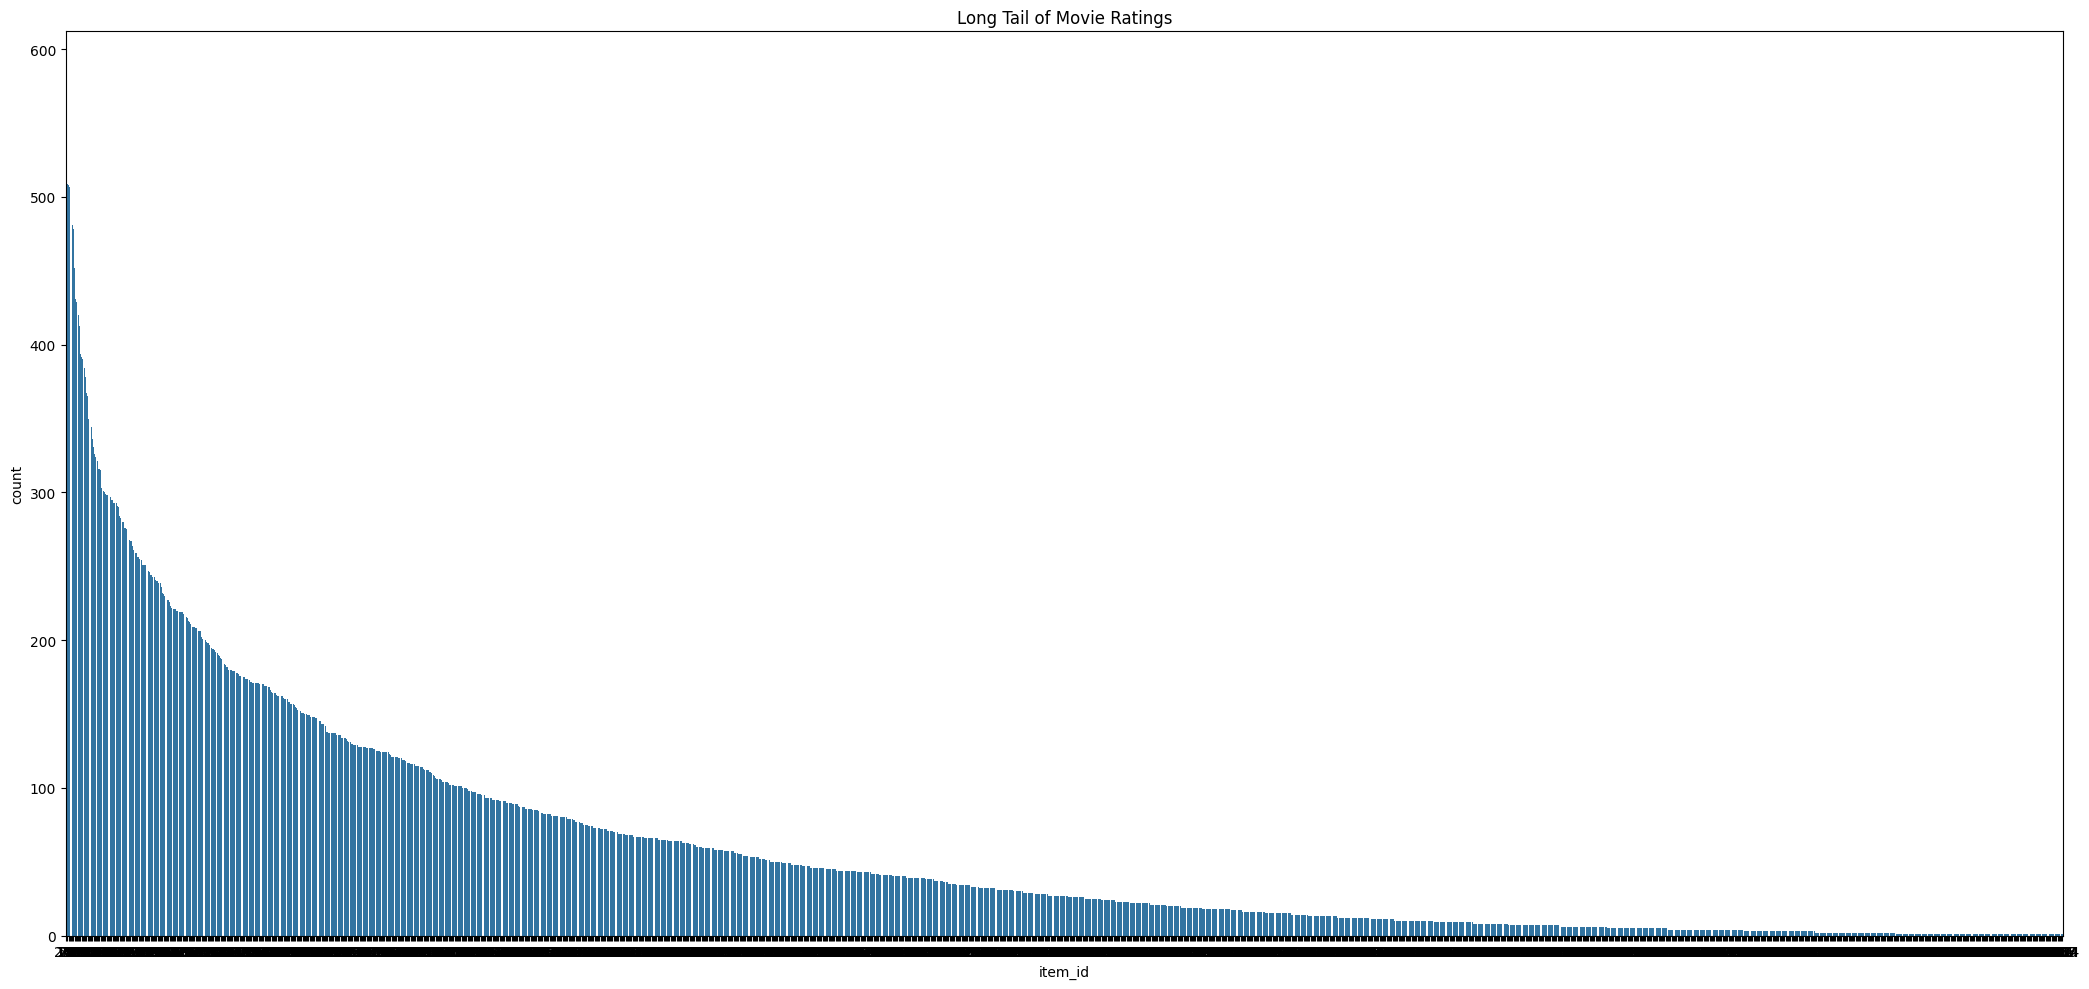

In [7]:
# Demonstrate long-tail problem
ratings_per_movie = ratings_df.groupby('item_id').size().reset_index(name='count')

# Plot the total amount a movie has been rated in descending order
plt.figure(figsize=(21, 10))
sns.barplot(
    x="item_id",
    y="count",
    data=ratings_per_movie, 
    order=ratings_per_movie.sort_values("count", ascending=False)["item_id"]
    )
plt.title("Long Tail of Movie Ratings")
plt.tight_layout()

# NOTE:
# Capture what the long tail problem is and how it affects collaborative filtering

In many cases, the high-frequency items tend to be relatively competitive items with little profit for the merchant. On the other hand, the lower frequency items have larger profit margins. In such cases, it may be advantageous to the merchant to recommend lower frequency items. In fact, analysis suggests that many companies, such as Amazon.com, make most of their profit by selling items in the long tail.

Because of the rarity of observed ratings in the long tail it is generally more difficult to provide robust rating predictions in the long tail. In fact, many recommendation algorithms have a tendency to suggest popular items rather than infrequent items. This phenomenon also has a **negative impact on diversity** and users may often become bored by receiving the same set of recommendations of popular items.

In [8]:
# Explore the example of a random user (i.e. user 196)
ratings_df[ratings_df["user_id"] == "196"]

,user_id,item_id,rating
0,196,242,3.0
940,196,393,4.0
1133,196,381,4.0
1812,196,251,3.0
1896,196,655,5.0
2374,196,67,5.0
6910,196,306,4.0
7517,196,238,4.0
7842,196,663,5.0
10017,196,111,4.0


In [9]:
# Construct the utility matrix
ratings_matrix = ratings_df.pivot_table(index='user_id', columns='item_id', values='rating', fill_value=np.NaN)
ratings_matrix

# NOTE:
# The NaN values represent movies that the user has not rated

item_id,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purpose of subsequent discussion, we assume that the user-item ratings matrix (i.e. ratings_matrix)
is an incomplete $m × n$ matrix $R = [r_{uj}]$ containing $m=943$ users and $n=1682$ items.

We can see that only a small subset of the ratings matrix is specified or observed. Our goal would be to understand which items (i.e. movies) we should recommend to the users that would be likely to see. Like all other collaborative filtering algorithms, neighborhood-based collaborative filtering algorithms can be formulated in one of two ways to address the the recommendation problem:
1. Predicting the rating value of a user-item combination.
2. Determining the top-k items or top-k users.

Lastly, in the context of recommender systems, especially user-based collaborative filtering, sparsity refers to the proportion of missing ratings in the user-item interaction matrix. For a robust collaborative filtering model to work a dense matrix would be needed so that we can use the collaborative power of other users. In other words, with a sparse matrix user "similarities" might be unreliable and there would be a low coverage of items.

In [10]:
# Calculate the sparsity of the ratings matrix
total_elements = ratings_matrix.size
non_nan_elements = np.count_nonzero(~np.isnan(ratings_matrix))
density = non_nan_elements / total_elements

print("Matrix sparsity: {:.2%}".format(1 - density)) # sparsity = (# ratings) / ( total # of elements)

# NOTE:
# Sparsity is a measure of how much of the matrix is empty (i.e. not rated)

Matrix sparsity: 93.70%


There is no universally "good" level of sparsity, as it depends on the specific dataset and the methods used for recommendation. However, some general guidelines suggest that datasets with sparsity levels below 80% are considered dense enough to perform well with user-based collaborative filtering. On the other hand, Datasets with sparsity levels above 90% are considered sparse. This high level of sparsity can pose significant challenges for user-based collaborative filtering methods.

For the purposes of the notebook, we won't be bothered to much about the sparsity as the main goal is to explore the mathematics and underlying properties of the different collaborative filtering techniques.

### 2a. Memory-based Collaborative Filtering

#### User-Based Methods

In [11]:
# Import cornac library (for collaborative filtering)
import cornac
from cornac.eval_methods import RatioSplit
from cornac.models import UserKNN

In the memory-based collaborative filtering approach, user-based neighborhoods are defined in order to identify similar users to the _target_ user for whom the rating predictions are being computed. 

For the $m × n$ ratings matrix $R = [r_{uj}]$ with $m$ users and $n$ items, let $I_u$ denote the set of item indices for which ratings have been specified by user (row) $u$. The problem at hand is to predict the user's rating for item $j$.

The most common **predictive function** of the neighborhood-based predictive function is the following:

$$ \hat{r}_{uj} = \mu_u + \frac{ \sum\limits_{v \in P^{k}_u(j)} \text{Sim}(u, v) \cdot (r_{vj} - \mu_v)} {\sum\limits_{v \in P^{k}_u(j)} \text{Sim}(u, v)} = \mu_u + \frac{ \sum\limits_{v \in P^{k}_u(j)} \text{Sim}(u, v) \cdot s_{vj}} {\sum\limits_{v \in P^{k}_u(j)} \text{Sim}(u, v)} $$

where:
- $\hat{r}_{uj}$ indicates a predicted rating of user $u$ for item $j$.
- $\mu_u$ being the average rating of the user $u$.
- $r_{uj} $ being the rating of user $u$ for item $j$.
- $ P_u(j) = $ be the set of $k$ closest users to target user $u$, who have specified ratings for item $ j $.
- $\text{Sim}(u, v)$ being the similarity of target user $u$ with user $v$.
- $s_{vj} = r_{vj} - \mu_v, \space\space \forall v \in \{1, \dots, m\}$.

The average rating $\mu_u$ of the user is calculated as:
$$ \mu_u = \frac{\Sigma_{k \in \mathcal{I}_u} r_{uk}}{|\mathcal{I}_u|} \ \ \forall u \in \{1, \dots, m\}$$

💡The reason why we substract the mean of each user with their ratings (i.e. standarise the ratings) is that different users may provide ratings on different scales. One user might rate all items highly, whereas another user might rate all items negatively. The raw ratings, therefore, need to be mean-centered in row-wise fashion, before determining the (weighted) average rating of the peer group. The mean-centered rating $s_{uj}$ of a user $u$ for item $j$ is defined by subtracting her mean rating from the raw rating $r_{uj}$ as shown above.💡

In [12]:
# Average rating of user 196
print("# Average rating of user 196:", round(ratings_df[ratings_df["user_id"] == "196"]["rating"].mean(), 2))

# Average rating of user 350
print("# Average rating of user 350:", round(ratings_df[ratings_df["user_id"] == "350"]["rating"].mean(), 2))

# Average rating of user 196: 3.62
# Average rating of user 350: 4.32


We can see that all the components of the predictive function are known apart from the $\text{Sim}(u,v)$ which is not specified yet. In order to determine the neighborhood of the target user $u$, their **similarity** to all the other users needs to computed. 

There are different similarities that can be used with each one having their pros and cons. An example of popular similarities are the Pearson similarity and the Raw Cosine similarity:

\begin{align*}
\mathrm{Sim}(u,v) = \mathrm{Pearson}(u,v) &= \frac{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} (r_{uk} - \mu_u) * (r_{vk} - \mu_v)}{\sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} (r_{uk} - \mu_u)^2} * \sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} (r_{vk} - \mu_v)^2}}
\end{align*}

\begin{align*}
\mathrm{Sim}(u,v) = \mathrm{RawCosine}(u,v) &= \frac{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} r_{uk} * r_{vk}}{\sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} r_{uk}^2} * \sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} r_{vk}^2}}
\end{align*}

The reliability of the similarity function $\text{Sim}(u, v)$ is often affected by the number of common ratings $|I_u ∩ I_v|$ between users $u$ and $v$. <br>
**Note:** The Pearson correlation coefficient is preferable to the raw cosine because of the bias adjustment effect of mean-centering.

In order to build our model, we will split our data into train and test set similarly to traditional ML models.

In [13]:
VERBOSE=False
SEED=42

# Split the data into training and testing sets
train_test_ratio_split = RatioSplit(
    cornac_ratings, 
    test_size=0.2,       # Use 20% of the data for testing.
    rating_threshold=3,  # Only items with ratings >= 3 are considered as relevant. (recall unbalanced rating scale)
    seed=SEED,
    verbose=VERBOSE,
    )

![Train & Test in Recommender Systems](img/train-test-ml-recsys.png)

In [14]:
# Define evaluation metrics for the collaborative filtering model
METRICS = [
    cornac.metrics.RMSE(),
    cornac.metrics.MAE(),
    cornac.metrics.Precision(k=10), # Precision @k = (# of relevant movies recommended) / k
    cornac.metrics.Recall(k=10),    # Recall @k = (# of relevant movies recommended) / (# of relevant movies)
    cornac.metrics.NDCG(k=10),
    cornac.metrics.MAP(),
    ]

# NOTE:
# Relevant movies are those with ratings >= 3

In [15]:
# Number of neighbors (i.e. look 50 "nearest" users)
K=50

# Define k-nn models with different similarity metrics
uknn_pearson = UserKNN(
    k=K, similarity="pearson", mean_centered=True, name="UserKNN-pearson", verbose=VERBOSE
)

uknn_adjusted_cosine = UserKNN(
    k=K, similarity="cosine", mean_centered=True, name="UserKNN-adjusted-cosine", verbose=VERBOSE
)

uknn_raw_cosine = UserKNN(
    k=K, similarity="cosine", mean_centered=False, name="UserKNN-raw-cosine", verbose=VERBOSE
)

# NOTE:
# The number of K was selected randomly as the determination of the best K is out of the scope of this notebook. 
# However, the best K can be determined using hyperparameter tuning techniques with cross-validation similarly to traditional ML techniques.

In [16]:
# Execute an experiment to evaluate the models on the pre-specified metrics
experiment = cornac.Experiment(
    eval_method=train_test_ratio_split,
    models=[uknn_pearson, uknn_adjusted_cosine, uknn_raw_cosine],
    metrics=METRICS,
)
experiment.run()

# NOTE:
# Generally, the adjusted cosine similarity is used in item-based collaborative filtering as the average rating of each item (and not user) in the ratings matrix is subtracted from each rating.
# However, in user-based collaborative filtering, the mean-centered cosine similarity is used as the average rating of each user is subtracted from each rating (hence the same results).


TEST:
...
                        |    MAE |   RMSE |    MAP | NDCG@10 | Precision@10 | Recall@10 | Train (s) | Test (s)
----------------------- + ------ + ------ + ------ + ------- + ------------ + --------- + --------- + --------
UserKNN-pearson         | 0.7511 | 0.9196 | 0.0227 |  0.0004 |       0.0003 |    0.0002 |    0.0588 |   3.7701
UserKNN-adjusted-cosine | 0.7511 | 0.9196 | 0.0227 |  0.0004 |       0.0003 |    0.0002 |    0.0388 |   3.7928
UserKNN-raw-cosine      | 0.7616 | 0.9278 | 0.0251 |  0.0004 |       0.0005 |    0.0004 |    0.0393 |   3.7907



#### Similarity Weighting

As discussed in the beginning, the distribution of ratings typically shows a **long-tail** distribution in many real scenarios. Some movies may be very popular and they may repeatedly occur as commonly rated items by different users.

The negative impact of these recommendations can be experienced both during the peer group computation and also during the prediction computation. This notion is similar in principle to the deterioration in retrieval quality caused by popular and noninformative words (e.g., “a,” “an,” “the”) in document retrieval applications. Therefore, the proposed solutions used in collaborative filtering are also similar to those used in the information retrieval literature.

Just as the notion of Inverse Document Frequency (idf) exists in the information retrieval, one can use the notion of Inverse User Frequency as follows:


$$ w_j = \log \bigg( \frac{m}{m_j} \bigg), \space \forall j \in \{1, \dots n\} $$

where 
- $ m= $ total number of users.
- $ m_j = $ total number of ratings of item $ j $.
- $ n= $ total number of items.

As a result, the Pearson similarity can be rewritten using the idf weights creating the following formula:

\begin{align*}

\mathrm{Pearson}(u,v) &= \frac{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} w_{k}(r_{uk} - \mu_u) * (r_{vk} - \mu_v)}{\sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} w_{k}(r_{uk} - \mu_u)^2} * \sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} w_{k}(r_{vk} - \mu_v)^2}}

\end{align*}

In [17]:
# Create idf weighting model using the pearson similarity metric
uknn_idf = UserKNN(
  k=K, similarity="pearson", weighting="idf", name="UserKNN-IDF", verbose=VERBOSE
)

In [18]:
# Execute an experiment to evaluate the models on RMSE and MAE
experiment_with_idf = cornac.Experiment(
    eval_method=train_test_ratio_split,
    models=[uknn_pearson, uknn_raw_cosine, uknn_idf],
    metrics=METRICS,
)
experiment_with_idf.run()


TEST:
...
                   |    MAE |   RMSE |    MAP | NDCG@10 | Precision@10 | Recall@10 | Train (s) | Test (s)
------------------ + ------ + ------ + ------ + ------- + ------------ + --------- + --------- + --------
UserKNN-pearson    | 0.7511 | 0.9196 | 0.0227 |  0.0004 |       0.0003 |    0.0002 |    0.0454 |   3.8609
UserKNN-raw-cosine | 0.7616 | 0.9278 | 0.0251 |  0.0004 |       0.0005 |    0.0004 |    0.0400 |   3.7682
UserKNN-IDF        | 0.7519 | 0.9205 | 0.0219 |  0.0004 |       0.0003 |    0.0002 |    0.0392 |   3.7428



In our case, it seems that IDF weighting does not perform better than the pearson correlation. A possible explanation can be that, even though IDF weighting gives more weight to less common items, if these items are not necessarily better indicators of user preferences but are simply less interacted with, this can lead to misleading similarity calculations. As a result, this can lead to an overemphasis on rare items which then leads to recommending items that are not truly relevant, reducing precision and recall.

It's generally a good idea to experiment with and without IDF weighting to see if it improves your specific recommendation task. In many cases, incorporating such weighting schemes can lead to more personalized and accurate recommendations as it decreases popularity bias.

Overall, memory-based collaborative filtering, like any other traditional ML techniques, come with their advantages and disadvantages:
- **Pros**:
  1. Easy to implement.
  2. Easy to explain.

- **Cons**:
  1. Don't work well with sparse data (i.e. can't find enough users to "collaborate").
  2. Can be biased towards popular items reduce diversity and novelty. (i.e. **Popularity Bias**).
  3. Perform poorly with new users or items (**cold start problem**) because there is not enough interaction data to calculate similarities effectively. In such cases, content-based and knowledge-based methods are more preferably as they are more robust than collaborative models in the presence of **cold starts**.
  4. Don't scale well with large datasets.

### 2b. Model-based collaborative filtering

Neighborhood-based methods seen above are generalizations of instance-based learning methods or lazy learning methods in which the prediction approach is specific to the instance being predicted. For example, in user-based neighborhood methods, the peers of the target user are determined in order to perform the prediction.

In **model-based methods**, a summarized model of the data is created up front, as with supervised or unsupervised machine learning methods. Therefore, the training (or model building phase) is clearly separated from the prediction phase.

#### Matrix Factorisation

One of the most popular techniques of model-bases collaborative filtering is **Matrix Factorisation**. Factorisation is, in fact, a more general way of approximating a matrix (e.g. a ratings matrix) when it is prone to dimensionality reduction because of correlations between columns (or rows). The basic idea of dimensionality reduction methods is to rotate the axis system, so that pairwise correlations between dimensions are removed. Because of the inherent redundancies in the data, the fully specified low rank approximation can be determined even with a small subset of the entries in the original matrix. This fully-specified low rank approximation often provides a robust estimation of the missing entries.

In real life, the rating matrix we observe is very sparse. If we then assume that most matrices have a low-rank representation (it can be reconstructed from relatively few basis vectors), then one promising approach is to conduct matrix factorisation.

💡The key differences among various matrix factorization methods arise in terms of the constraints imposed on U and V (e.g., orthogonality or non-negativity of the latent vectors) and the nature of the objective function (e.g., minimizing the Frobenius norm or maximizing the likelihood estimation in a generative model). These differences play a key role in the usability of the matrix factorization model in various real-world scenarios.💡

##### [a] Singular Value Decomposition (SVD) in Linear Algebra

**Singular value decomposition (SVD)** in classical linear algebra a form of matrix factorisation in which the _columns of $U$ and $V$ are constrained to be mutually orthogonal_. Mutual orthogonality has the advantage that the concepts can be completely independent of one another, and they can be geometrically interpreted in scatterplots. However, the semantic interpretation of such a decomposition is generally more difficult, because these latent vectors contain both positive and negative quantities, and are constrained by their orthogonality to other concepts.

In SVD, one can approximately factorise the ratings matrix $R$ by using truncated SVD of rank $k ≪ min\{m, n\}$. <br>
For any real rating matrix $ R \in \mathbb{R}^{M \times N} $, SVD seeks the following decomposition:

$$ R = Q_k \Sigma_k P_{k}^{T} $$

Here, $Q_k$, $\Sigma_k$, and $P_k$ are matrices of size $m×k$, $k×k$, and $n×k$, respectively. However,the diagonal matrix $\Sigma_k$ can be absorbed in either the user factors $Q_k$ or the item factors $P_k$. By convention, the user factors and item factors are defined as follows:

- $ U = Q_k \Sigma_k $
- $ V = P_k $

Therefore, the factorisation of the ratings matrix $R$ is defined as $R = UV^{T}$. As long as the user and item factor matrices have orthogonal columns, it is easy to convert the resulting factorization into a form that is compliant with SVD.

SVD can be formulated, in general, as the following optimisation problem over the matrices $U$ and $V$:

$$ \text{Minimise} \space J = \frac{1}{2} ||R - UV^T||^2 $$

subject to:
- Columns of $U$ are mutually orthogonal.
- Columns of $V$ are mutually orthogonal.

##### [b] Singular Value Decomposition (SVD) in Collaborative Filtering

In collaborative filtering, the goal is to approximate the user-item rating matrix $R$ by factorizing it into two lower-rank matrices $U$ and $V$, such that $R≈UV^T$. The optimisation methods (such as Stochastic Gradient Descent or Alternating Least Squares) focus on minimizing the prediction error on the observed entries, not on maintaining orthogonality. Also, the SVD implementation of collaborative filtering includes bias terms for users and items to account for systematic rating deviations. The inclusion of these biases alters the structure of the factorization compared to the traditional SVD, making orthogonality less relevant.

As a result, the optimisation problem (with regularisation) that is being solved in the SVD implementation is the following:

$$ \text{Minimize } J = \frac{1}{2} \sum_{(u, i) \in \mathcal{S}} \left( R_{ui} - \mu - b_u - b_i - U_u \cdot V_i \right)^2 + \frac{\lambda}{2} \left( \sum_{u=1}^{M} \|U_u\|^2 + \sum_{i=1}^{N} \|V_i\|^2 + \sum_{u=1}^{M} b_u^2 + \sum_{i=1}^{N} b_i^2 \right) $$ 

where:
- $\mathcal{S}$ be the set of specified entries in the ratings matrix.
- $ \mu $ is the global average rating.
- $ b_u $ is the bias of user $u$.
- $ b_i $ is the bias of item $i$ 

The optimisation problem in order to learn $b_u$, $b_i$, $U_v$ and $V_i$ can traditionally be solved using the following methods:
  - Stochastic Gradient Descent (SGD)
  - Alternating Least Squares (ALS)
  - etc.

Each of these algorithms has its own strengths and trade-offs, but **SGD remains a popular choice** due to its advantages:
  - Scalability: SGD can handle large-scale data efficiently, making it suitable for large recommender system datasets.
  - Simplicity: The algorithm is relatively simple to implement and understand.
  - Effectiveness: Despite its simplicity, SGD is highly effective at finding good approximations of the user and item latent factors.

In [19]:
from cornac.models import SVD

In [20]:
MAX_ITER=20
LEARNING_RATE=0.01
LAMDA_REG=0.02

# Define the SVD model with regularisation
svd = SVD(
    k=K, max_iter=MAX_ITER, learning_rate=LEARNING_RATE, lambda_reg=LAMDA_REG, verbose=VERBOSE, name="UserSVD"
)

# Compare SVD (model-based) with Pearson and IDF models (memory-based)
cornac.Experiment(
    eval_method=train_test_ratio_split,
    models=[uknn_pearson, uknn_idf, svd],
    metrics=METRICS
).run()


TEST:
...
                |    MAE |   RMSE |    MAP | NDCG@10 | Precision@10 | Recall@10 | Train (s) | Test (s)
--------------- + ------ + ------ + ------ + ------- + ------------ + --------- + --------- + --------
UserKNN-pearson | 0.7511 | 0.9196 | 0.0227 |  0.0004 |       0.0003 |    0.0002 |    0.0591 |   3.7616
UserKNN-IDF     | 0.7519 | 0.9205 | 0.0219 |  0.0004 |       0.0003 |    0.0002 |    0.0404 |   3.7738
UserSVD         | 0.7334 | 0.8926 | 0.0568 |  0.0924 |       0.0840 |    0.0379 |    0.3107 |   0.5046



We can witness that the SVD model performs the best compared to the previous memory based approaches highlighting the robustness of model-based techniques.

Memory-based collaborative filtering techniques are powerful and here are some advantages and disadvantages that people should be aware of:
- **Pros**:
  1. Scalability.
  2. Sparsity Handling.
  3. Improved Accuracy.
  4. Reduction of Overfitting.
  5. Latent Factors Insight.

- **Cons**:
  1. Model-based approaches are often more complex and computationally intensive than memory-based methods.
  2. Model-based methods often involve multiple hyperparameters that need to be carefully tuned, such as the number of latent factors, regularization parameters, and learning rates.
  3. Similar to other collaborative filtering methods, model-based approaches suffer from the cold start problem. New users and items with no interaction history pose a challenge for making accurate recommendations.

There are different factorisation techniques that can be used. The following table is a generic breakdown (not exhaustive) of these techniques along with their Advantages and Disadvantages.

| Method          | Constraints     | Objective                     | Advantages/Disadvantages                                                                                              |
|-----------------|-----------------|-------------------------------|----------------------------------------------------------------------------------------------------------------------|
| Unconstrained   | No constraints  | Frobenius + regularizer       | Highest quality solution<br>Good for most matrices<br>Regularization prevents overfitting<br>Poor interpretability  |
| SVD             | Orthogonal Basis| Frobenius + regularizer       | Good visual interpretability<br>Out-of-sample recommendations<br>Good for dense matrices<br>Poor semantic interpretability<br>Suboptimal in sparse matrices |
| NMF             | Non-negativity  | Frobenius + regularizer       | Good quality solution<br>High semantic interpretability<br>Loses interpretability with both like/dislike ratings<br>Less overfitting in some cases |
